# PA 3: Association Analysis - Apriori Algorithm

## Programming Assignment Details

Before you start:
- Be familiar with the dataset.
- If you use external sources make sure that you cite them, and be specific! 
- Make sure that your code is running before you upload your submission file. TA will not debug your code.
- Start early!


For this assignment, you will have to use:
* Jupyter notebook, 
* the 'Groceries' dataset [01],
* and the Apriori Algorithm [02] (You can use the algorithm provided as reference)

Note:
* The algorithm to attached in the end, has to be reffered, and make sure to code it on your own.
* Any plagiarism detected will be subjected to additional consequences.

## - - - - - - - - - - - - - - - - - - - - - - - SOLUTION - - - - - - - - - - - - - - - - - - - - - - -

In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
# Import your Libraries
import pandas as pd
import csv
import matplotlib.pyplot as plt
from IPython.display import display, Image 


### Task 1: DataSet Preprocess
Before you start you need to modify your dataset 'dataset.csv' to look like the fruits.csv.  Each transaction is at one line with a variable length.  Discard the date attribute from your dataset.  

Export your modified dataset in a file named 'dataset_updated.csv'.

Use pandas to Read and Print the first 7 transactions of the 'dataset_updated.csv'.


ScreenShot of the fruits.csv


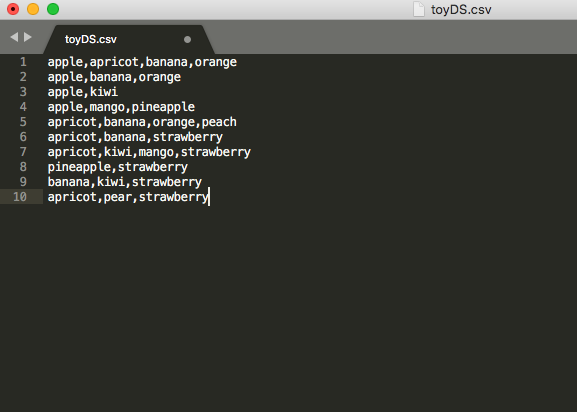

In [3]:
from IPython.display import Image
print ('ScreenShot of the fruits.csv')
Image("SampleScreen01.png")

In [4]:
# # # # # # # # #  Code for Task 1 # # # # # # # # #
############################Without Transaction id#####################################################

## Reference for newline: https://docs.python.org/3/library/csv.html#csv.csvwriter.writerow
## Reference: https://www.guru99.com/python-csv.html

"""Opening existing dataset in read mode and preprocessed dataset in write mode.
Initially the write format to preprocessed file is specified and the first record of dataset is accessed.
Later in a loop, next record is accessed and checked whether it's transaction id matches with the previous one or not.
If it matches then it is added to list of items seperated by comma, that belongs to the existing transaction.
If not then the duplicate values are removed from the existing list and added to updated dataset file.
(updated_line consist of list of items that belong to same transaction, seperated by comma.)"""

with open('dataset.csv','rt')as readfile ,open('dataset_updated.csv', mode='w', newline='') as retfile:
    #Setting reader and writer for existing dataset and preprocesse dataset.
    data = csv.reader(readfile)
    writer = csv.writer(retfile, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    #Reading the first record of dataset and retrieving transaction id and item name.
    line = next(data)
    transaction_id = line[1]
    item_name = line[2]
    #To maintain string with concatenated list of items of a transaction. 
    updated_line = ''
    while True:
        #Accesing the next record from the dataset.
        next_line = next(data,"End")
        #checks if it is end record, to exit the loop , by adding the transaction list items to preprocessed dataset.
        if next_line == "End":
            #Adding the retrieved list item to string with concatenated list of items of that transaction.
            updated_line = updated_line +str(item_name)
            #splitting the string to retrieve the list items of that transaction.
            temp = updated_line.split(',')
            #Removing the duplicate values from the list of items retrieved of that transaction.
            final_line = list(dict.fromkeys(temp))
            ## Reference: https://www.w3schools.com/python/ref_func_sorted.asp
            #Sorting the values of the list.
            final_line = sorted(final_line)
            #Adding the list of items of that transaction to the preprocessed dataset.
            writer.writerow(final_line)
            break
        #Retrieveing the transaction id and item name.    
        next_transaction_id = next_line[1]
        next_item_name = next_line[2]
        if int(transaction_id) == int(next_transaction_id) : 
            """When ids are equal adding the item to the list and updating values of previous record to current record"""
            updated_line = updated_line +str(item_name)+','
            line = next_line
            transaction_id = next_transaction_id
            item_name = next_item_name
        else:
            """When not equal, adding existing list to new dataset and and updating values of previous record to current record"""
            if updated_line :
                ## Reference: https://stackoverflow.com/questions/15478127/remove-final-character-from-string
                updated_line = updated_line[:-1]
                temp = updated_line.split(',')
                ##Reference: https://www.w3schools.com/python/python_howto_remove_duplicates.asp
                #Removes duplicate values from the contenst retrieved.
                final_line = list(dict.fromkeys(temp))
                ##Reference: https://www.w3schools.com/python/ref_func_sorted.asp
                final_line = sorted(final_line)
                writer.writerow(final_line)
                updated_line = ''            
            line = next_line
            transaction_id = next_transaction_id
            item_name = next_item_name


In [5]:
# # #  Solution  # # #

#Retrieveing the first 7 rows of updated datset, using csv.reader(), that shows the transactions as list of items.
with open('dataset_updated.csv','rt') as readfile:
    data = csv.reader(readfile)
    i = 7
    print("First 7 lines of dataset_updated.csv:\n")
    while i > 0:
        print(next(data))
        i = i - 1



First 7 lines of dataset_updated.csv:

['all- purpose', 'aluminum foil', 'beef', 'butter', 'dinner rolls', 'flour', 'ice cream', 'laundry detergent', 'lunch meat', 'mixes', 'pork', 'sandwich bags', 'shampoo', 'soap', 'soda', 'vegetables', 'yogurt']
['aluminum foil', 'cereals', 'cheeses', 'dishwashing liquid/detergent', 'hand soap', 'individual meals', 'laundry detergent', 'milk', 'mixes', 'sandwich bags', 'shampoo', 'toilet paper', 'tortillas', 'vegetables', 'waffles', 'yogurt']
['bagels', 'cereals', 'cheeses', 'dinner rolls', 'eggs', 'hand soap', 'ice cream', 'ketchup', 'laundry detergent', 'lunch meat', 'milk', 'pork', 'poultry', 'sandwich loaves', 'shampoo', 'soap', 'soda', 'spaghetti sauce', 'toilet paper', 'vegetables']
['cereals', 'juice', 'lunch meat', 'soda', 'toilet paper']
['all- purpose', 'dinner rolls', 'eggs', 'flour', 'hand soap', 'individual meals', 'milk', 'mixes', 'paper towels', 'pasta', 'pork', 'poultry', 'sandwich loaves', 'soda', 'spaghetti sauce', 'toilet paper', 

In [6]:
#Retrieveing the first 7 rows of updated datset, using read_csv(), that shows the transactions as concatenated item names.
df = pd.read_csv('dataset_updated.csv',sep ='\t',names=["Items"])
print(df.head(7))

                                               Items
0  all- purpose,aluminum foil,beef,butter,dinner ...
1  aluminum foil,cereals,cheeses,dishwashing liqu...
2  bagels,cereals,cheeses,dinner rolls,eggs,hand ...
3         cereals,juice,lunch meat,soda,toilet paper
4  all- purpose,dinner rolls,eggs,flour,hand soap...
5  all- purpose,aluminum foil,bagels,butter,cerea...
6  all- purpose,beef,dishwashing liquid/detergent...


### Task 2: Implement apriory algorithm and Evaluate Results 

In this task, you have to find how you will be able to execute and print apriory results.
(*) For those that are not familiar with python and coding this could be a quite demanding task.

* Use this as a reference to use the apriori algorithm.[https://github.com/asaini/Apriori]

You will have to execute apriori algorithm "3" times for different combinations of support and confidence.
Print the results of apriory for 'dataset.csv'. 

Do not forget to add your reasoning (explain the result outcome) at the top of each case in a nice and readable way. 

You are allowed to use the python print method to print your results. DO NOT add your reasoning or observation as comments. 


In [12]:
print ('# # # # # # # # #  Code for Task 2, Case:1 # # # # # # # # #') 
print ('Case 1 (minimum support=0.1 and minimum confidence=0.8)')
print ('Case 1 Reasoning: With minimum support value, the number of item sets that will satisfy the minimum support value increases.\nThereby increasing the number of rules that can be generated using these itemsets.')
print ('Case 1 Output:')
#Reference:https://stackoverflow.com/questions/51551056/running-a-python-script-in-jupyter-notebook-with-arguments-passing
!ipython apriori.py dataset_updated.csv 0.1 0.80


# # # # # # # # #  Code for Task 2, Case:1 # # # # # # # # #
Case 1 (minimum support=0.1 and minimum confidence=0.8)
Case 1 Reasoning: With minimum support value, the number of item sets that will satisfy the minimum support value increases.
Thereby increasing the number of rules that can be generated using these itemsets.
Case 1 Output:

------------------------ Item: Itemset, Support Value    ------------------

item: ('shampoo', 'vegetables', 'pork') , 0.100
item: ('soap', 'pork', 'vegetables') , 0.100
item: ('vegetables', 'hand soap', 'cheeses') , 0.100
item: ('vegetables', 'pork', 'butter') , 0.100
item: ('fruits', 'butter', 'vegetables') , 0.100
item: ('vegetables', 'dishwashing liquid/detergent', 'hand soap') , 0.100
item: ('vegetables', 'all- purpose', 'butter') , 0.100
item: ('tortillas', 'ketchup', 'vegetables') , 0.100
item: ('pasta', 'toilet paper', 'vegetables') , 0.100
item: ('soda', 'vegetables', 'pork') , 0.100
item: ('vegetables', 'hand soap', 'cereals') , 0.100
item: 

item: ('yogurt', 'vegetables', 'butter') , 0.110
item: ('vegetables', 'dinner rolls', 'butter') , 0.110
item: ('pork', 'vegetables', 'dinner rolls') , 0.110
item: ('shampoo', 'butter', 'vegetables') , 0.110
item: ('vegetables', 'hand soap', 'poultry') , 0.110
item: ('individual meals', 'sandwich bags', 'vegetables') , 0.110
item: ('fruits', 'vegetables', 'milk') , 0.110
item: ('bagels', 'vegetables', 'pork') , 0.110
item: ('sandwich loaves', 'vegetables', 'sugar') , 0.110
item: ('beef', 'vegetables', 'milk') , 0.110
item: ('butter', 'vegetables', 'spaghetti sauce') , 0.110
item: ('individual meals', 'beef', 'vegetables') , 0.110
item: ('sandwich bags', 'toilet paper', 'vegetables') , 0.110
item: ('fruits', 'pasta', 'vegetables') , 0.110
item: ('sandwich bags', 'beef', 'vegetables') , 0.110
item: ('soap', 'butter', 'vegetables') , 0.110
item: ('sugar', 'tortillas', 'vegetables') , 0.110
item: ('bagels', 'vegetables', 'all- purpose') , 0.110
item: ('pasta', 'bagels', 'vegetables') , 0.11

item: ('vegetables', 'ketchup', 'aluminum foil') , 0.120
item: ('waffles', 'vegetables', 'shampoo') , 0.120
item: ('mixes', 'vegetables', 'laundry detergent') , 0.120
item: ('ice cream', 'vegetables', 'paper towels') , 0.120
item: ('waffles', 'vegetables', 'laundry detergent') , 0.120
item: ('pasta', 'vegetables', 'paper towels') , 0.120
item: ('lunch meat', 'vegetables', 'all- purpose') , 0.120
item: ('individual meals', 'eggs', 'vegetables') , 0.120
item: ('coffee/tea', 'yogurt', 'vegetables') , 0.120
item: ('pasta', 'ice cream', 'vegetables') , 0.120
item: ('sandwich bags', 'vegetables', 'eggs') , 0.120
item: ('ice cream', 'vegetables', 'milk') , 0.120
item: ('eggs', 'beef', 'vegetables') , 0.120
item: ('eggs', 'vegetables', 'butter') , 0.120
item: ('eggs', 'vegetables', 'pork') , 0.120
item: ('coffee/tea', 'sandwich loaves', 'vegetables') , 0.120
item: ('lunch meat', 'vegetables', 'pork') , 0.120
item: ('shampoo', 'vegetables', 'dinner rolls') , 0.120
item: ('ice cream', 'vegetable

Case 1 Visualization: Graph & Observations


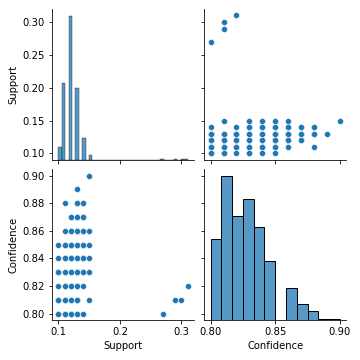

Observations:
(1)In the plot, the bottom left graph portion of the matrix is actually the same and the top right graph portion of the matrix, with the axes flipped. The diagonal row is simply a histogram of each variable and number of occurrences.
(2)Notices that the number of itemsets with support value with in 0.14 are more and only few itemsets exist after 0.25 value.
(3) Notices that the number of rules with confidence values in between 0.80 and 0.85 are more.
(4)From top right  graph portion of matrix, we can notice that a moderately postive correlation exist. With increse in confidence values, the support of the rule is moderately high.
(5)From bottom left graph portion of matrix, we can notice that lesser the support value, more rules satisfies the confidence threshold value.


In [13]:
#Plot for evaluating the results, is saved as image using apriori.py program
print ('Case 1 Visualization: Graph & Observations')
#Reference:https://medium.com/@jaimejcheng/data-exploration-and-visualization-with-seaborn-pair-plots-40e6d3450f6d#:~:text=Pair%20Plots%20are%20a%20really,of%20regression%20analysis%20to%20use.
display(Image("0.1_0.8_plot.png"))
print ('Observations:\n(1)In the plot, the bottom left graph portion of the matrix is actually the same and the top right graph portion of the matrix, with the axes flipped. The diagonal row is simply a histogram of each variable and number of occurrences.\n(2)Notices that the number of itemsets with support value with in 0.14 are more and only few itemsets exist after 0.25 value.\n(3) Notices that the number of rules with confidence values in between 0.80 and 0.85 are more.\n(4)From top right  graph portion of matrix, we can notice that a moderately postive correlation exist. With increse in confidence values, the support of the rule is moderately high.\n(5)From bottom left graph portion of matrix, we can notice that lesser the support value, more rules satisfies the confidence threshold value.')

In [15]:
print ('# # # # # # # # #  Code for Task 2, Case:2 # # # # # # # # #') 
print ('Case 2 (minimum support=0.25 and minimum confidence=0.60)') 
print ('Case 2 Reasoning: As noticed in the above case as the number of itemsets with support value more than 0.25 is less, we are considering that case for analysis.\n With increase in the minimum support value, the number of items sets that satisfies minimum support value decreases and thereby, less rules can be generated. \n With decrease in confidence, the number of occurence of records satisfying the rule in the transaction list can be less comparitively.')
print ('Case 2 Output:')
#Reference:https://stackoverflow.com/questions/51551056/running-a-python-script-in-jupyter-notebook-with-arguments-passing
!ipython apriori.py dataset_updated.csv 0.25 0.60

# # # # # # # # #  Code for Task 2, Case:2 # # # # # # # # #
Case 2 (minimum support=0.25 and minimum confidence=0.60)
Case 2 Reasoning: As noticed in the above case as the number of itemsets with support value more than 0.25 is less, we are considering that case for analysis.
 With increase in the minimum support value, the number of items sets that satisfies minimum support value decreases and thereby, less rules can be generated. 
 With decrease in confidence, the number of occurence of records satisfying the rule in the transaction list can be less comparitively.
Case 2 Output:

------------------------ Item: Itemset, Support Value    ------------------

item: ('pork', 'vegetables') , 0.250
item: ('flour', 'vegetables') , 0.260
item: ('vegetables', 'sandwich loaves') , 0.260
item: ('tortillas', 'vegetables') , 0.260
item: ('sandwich bags', 'vegetables') , 0.270
item: ('fruits', 'vegetables') , 0.270
item: ('vegetables', 'sugar') , 0.270
item: ('ketchup', 'vegetables') , 0.270
item:

Case 2 Visualization: Graph & Observations


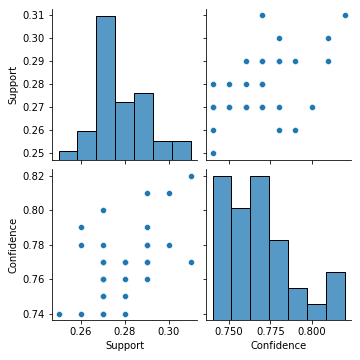

Observations:
(1)In the plot, the bottom left graph portion of the matrix is actually the same and the top right graph portion of the matrix, with the axes flipped. The diagonal row is simply a histogram of each variable and number of occurrences.
(2)Notices that the number of itemsets staisfying minimum support value decreased.
(3) Notices that the number of rules satisfying the confidence value incresed comparitively.
(4)From top right  graph portion of matrix, we can notice that a fairly postive correlation exist. With increse in confidence values, the support of the rule required is moderately high.
(5)From bottom left graph portion of matrix, we can notice that lesser the support value, more rules satisfies the confidence threshold value.


In [18]:
#Image is saved as picture using apriori.py

print ('Case 2 Visualization: Graph & Observations')
display(Image("0.25_0.6_plot.png"))
print ('Observations:\n(1)In the plot, the bottom left graph portion of the matrix is actually the same and the top right graph portion of the matrix, with the axes flipped. The diagonal row is simply a histogram of each variable and number of occurrences.\n(2)Notices that the number of itemsets staisfying minimum support value decreased.\n(3) Notices that the number of rules satisfying the confidence value incresed comparitively.\n(4)From top right  graph portion of matrix, we can notice that a fairly postive correlation exist. With increse in confidence values, the support of the rule required is moderately high.\n(5)From bottom left graph portion of matrix, we can notice that lesser the support value, more rules satisfies the confidence threshold value.')


In [20]:
print ('# # # # # # # # #  Code for Task 2, Case:3 # # # # # # # # #') 
print ('Case 3 (minimum support=0.14 and minimum confidence=0.80)')
print ('Case 3 Reasoning: From above two cases, we observered that less threshold value or large threshold value can impact a lot. So for optimal results, we considered the minimum support value within the range of task 1 and task2 values for better results. As it will help us in avoiding the cases of considering too many or too less item sets. Higher confidence value will help in selecting those rules whose occurance is high in the possible cases that we consider ')
print ('Case 3 Output:')
#Reference:https://stackoverflow.com/questions/51551056/running-a-python-script-in-jupyter-notebook-with-arguments-passing
!ipython apriori.py dataset_updated.csv 0.14 0.80

# # # # # # # # #  Code for Task 2, Case:3 # # # # # # # # #
Case 3 (minimum support=0.14 and minimum confidence=0.80)
Case 3 Reasoning: From above two cases, we observered that less threshold value or large threshold value can impact a lot. So for optimal results, we considered the minimum support value within the range of task 1 and task2 values for better results. As it will help us in avoiding the cases of considering too many or too less item sets. Higher confidence value will help in selecting those rules whose occurance is high in the possible cases that we consider 
Case 3 Output:

------------------------ Item: Itemset, Support Value    ------------------

item: ('beef', 'soap') , 0.140
item: ('paper towels', 'shampoo') , 0.140
item: ('milk', 'coffee/tea') , 0.140
item: ('sandwich bags', 'bagels') , 0.140
item: ('milk', 'hand soap') , 0.140
item: ('sugar', 'cheeses') , 0.140
item: ('lunch meat', 'bagels') , 0.140
item: ('butter', 'waffles') , 0.140
item: ('waffles', 'pork') , 

item: ('individual meals', 'toilet paper') , 0.150
item: ('butter', 'sandwich bags') , 0.150
item: ('pasta', 'ice cream') , 0.150
item: ('fruits', 'waffles') , 0.150
item: ('dishwashing liquid/detergent', 'eggs') , 0.150
item: ('yogurt', 'toilet paper') , 0.150
item: ('pasta', 'cereals') , 0.150
item: ('tortillas', 'bagels') , 0.150
item: ('dishwashing liquid/detergent', 'soda') , 0.150
item: ('butter', 'lunch meat') , 0.150
item: ('spaghetti sauce', 'eggs') , 0.150
item: ('juice', 'individual meals') , 0.150
item: ('individual meals', 'waffles') , 0.150
item: ('pasta', 'cheeses') , 0.150
item: ('spaghetti sauce', 'lunch meat') , 0.150
item: ('paper towels', 'waffles') , 0.150
item: ('all- purpose', 'ketchup') , 0.150
item: ('milk', 'paper towels') , 0.150
item: ('sandwich bags', 'soda') , 0.150
item: ('dishwashing liquid/detergent', 'dinner rolls') , 0.150
item: ('sandwich loaves', 'individual meals') , 0.150
item: ('cheeses', 'individual meals') , 0.150
item: ('all- purpose', 'lunch 

Case 3 Visualization: Graph & Observations


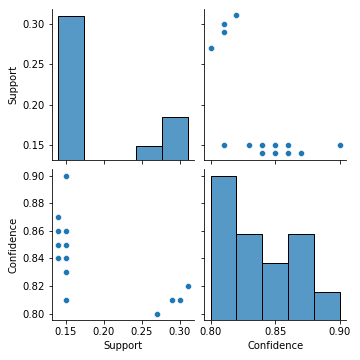

Observations:
(1)In the plot, the bottom left graph portion of the matrix is actually the same and the top right graph portion of the matrix, with the axes flipped. The diagonal row is simply a histogram of each variable and number of occurrences.
(2)Notices that the number of itemsets with support value of 0.15 are significantly more.
(3) Notices that the number of rules satisfying the confidence value at 0.80 bar are significantly high.
(4)From top right  graph portion of matrix, we can notice that a moderately postive correlation exist. With increse in confidence values, the support of the rule required is moderately high.
(5)From bottom left graph portion of matrix, we can notice that lesser the support value, more rules satisfies the confidence threshold value.


In [22]:
#Image is saved as picture using apriori.py
from IPython.display import display,Image
print ('Case 3 Visualization: Graph & Observations')
display(Image("0.14_0.8_plot.png"))
print ('Observations:\n(1)In the plot, the bottom left graph portion of the matrix is actually the same and the top right graph portion of the matrix, with the axes flipped. The diagonal row is simply a histogram of each variable and number of occurrences.\n(2)Notices that the number of itemsets with support value of 0.15 are significantly more.\n(3) Notices that the number of rules satisfying the confidence value at 0.80 bar are significantly high.\n(4)From top right  graph portion of matrix, we can notice that a moderately postive correlation exist. With increse in confidence values, the support of the rule required is moderately high.\n(5)From bottom left graph portion of matrix, we can notice that lesser the support value, more rules satisfies the confidence threshold value.')


# References

[01] https://www.kaggle.com/heeraldedhia/groceries-dataset

[02] https://github.com/asaini/Apriori

[03] https://docs.python.org/3/library/csv.html#csv.csvwriter.writerow

[04] https://www.guru99.com/python-csv.html

[05] https://www.w3schools.com/python/ref_func_sorted.asp

[06] https://stackoverflow.com/questions/15478127/remove-final-character-from-string

[07] https://www.w3schools.com/python/python_howto_remove_duplicates.asp

[08] https://www.w3schools.com/python/ref_func_sorted.asp

[09] https://stackoverflow.com/questions/51551056/running-a-python-script-in-jupyter-notebook-with-arguments-passing

[10] https://seaborn.pydata.org/examples/scatterplot_matrix.html

[11] https://medium.com/@jaimejcheng/data-exploration-and-visualization-with-seaborn-pair-plots-40e6d3450f6d#:~:text=Pair%20Plots%20are%20a%20really,of%20regression%20analysis%20to%20use.
